# Importando Bibliotecas

In [41]:
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import pandas as pd

In [12]:
df = pd.read_csv("DiferençaPromoçõesReceita.csv", sep=";")

display(df)

,id_produto,Dias_Promo,Receita_Promo,Dias_SemPromo,Receita_SemPromo
0,1,6,4253.214971,214,118660.399289
1,2,9,4375.212551,203,122166.277502
2,3,2,1911.540702,219,134854.837597
3,4,4,830.135222,235,137013.566817
4,5,6,3513.657805,232,146804.107479
...,...,...,...,...,...
598,993,6,3676.447859,234,148889.853304
599,994,2,2959.691542,242,144190.942735
600,997,10,6310.800330,240,143539.554371
601,998,3,1527.159176,228,143055.226279


In [13]:
mean_receita_promo = df['Receita_Promo'] / df['Dias_Promo']
mean_receita_sempromo = df['Receita_SemPromo'] / df['Dias_SemPromo']

# Realizar o teste t
t_stat, p_value = stats.ttest_ind(mean_receita_promo, mean_receita_sempromo)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.15614170536662791
P-value: 0.8759475007859607


In [14]:
# Calcular o número de observações em cada grupo
n_promo = len(mean_receita_promo)
n_sempromo = len(mean_receita_sempromo)

# Calcular a variância de cada grupo
variance_promo = mean_receita_promo.var()
variance_sempromo = mean_receita_sempromo.var()

# Calcular o desvio padrão de cada grupo
std_dev_promo = mean_receita_promo.std()
std_dev_sempromo = mean_receita_sempromo.std()

print(f"Desvio padrão da receita média com promoção: {std_dev_promo}")
print(f"Desvio padrão da receita média sem promoção: {std_dev_sempromo}")


Desvio padrão da receita média com promoção: 311.8987874535205
Desvio padrão da receita média sem promoção: 33.647394546709684


In [15]:
# Calcular o erro padrão da média para cada grupo
sem_promo = std_dev_promo / (n_promo ** 0.5)
sem_sempromo = std_dev_sempromo / (n_sempromo ** 0.5)

print(f"Erro padrão da receita média com promoção: {sem_promo}")
print(f"Erro padrão da receita média sem promoção: {sem_sempromo}")


Erro padrão da receita média com promoção: 12.701500519533981
Erro padrão da receita média sem promoção: 1.3702278319362988


# Pearson entre receita e dias de promoção

Pearson entre dias de promoção e receita gerada: 0.8772624047869646
p-valor: 1.0023200142117647e-193




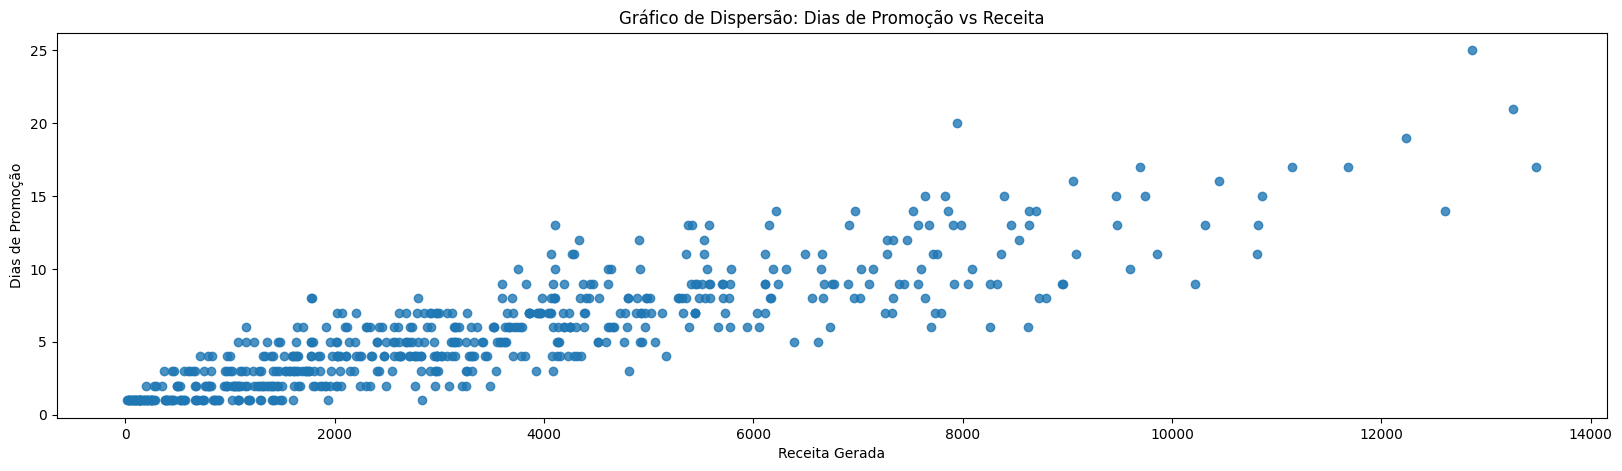

In [44]:
dias_promo = df["Dias_Promo"]
receita_promo = df['Receita_Promo']

pearson_promo, p_valor = stats.pearsonr(dias_promo, receita_promo)
print(f"Pearson entre dias de promoção e receita gerada: {pearson_promo}\np-valor: {p_valor}\n\n")


plt.figure(figsize=(20,5))
plt.scatter(receita_promo, dias_promo, alpha=0.8, label="Dados")


plt.title("Gráfico de Dispersão: Dias de Promoção vs Receita")
plt.xlabel("Receita Gerada")
plt.ylabel("Dias de Promoção")


plt.show()

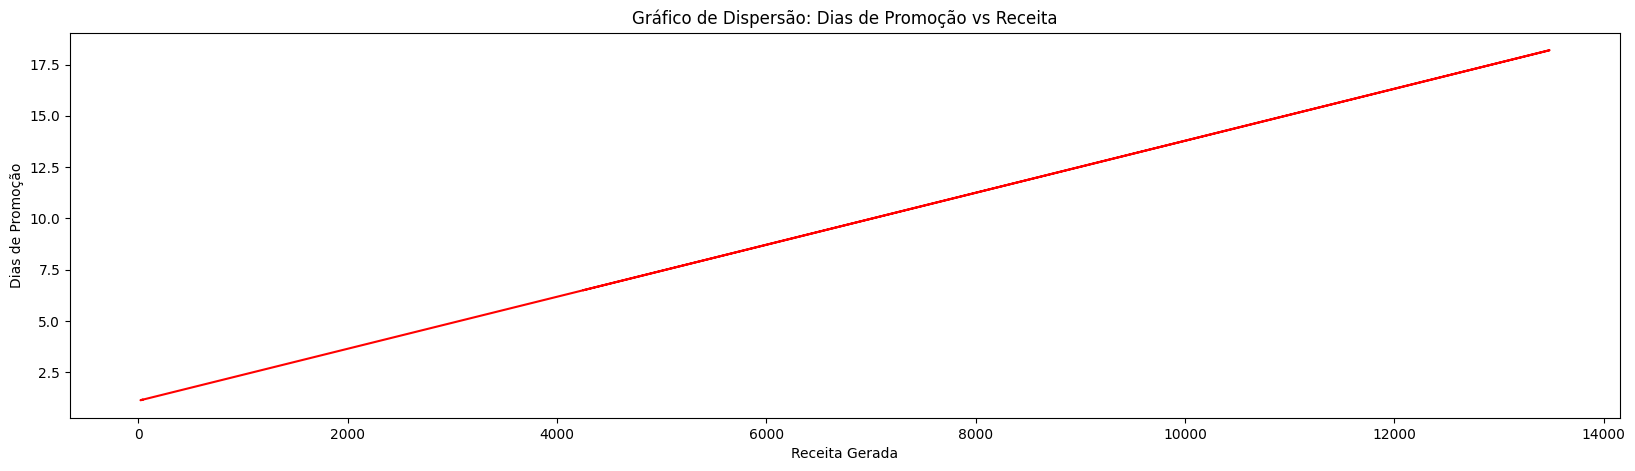

In [51]:
# Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(receita_promo, dias_promo)

# Valores preditos
predicted_diaspromo = intercept + slope * receita_promo

plt.figure(figsize=(20,5))
plt.plot(receita_promo,predicted_dias, color="red", label="Regressão Linear")

plt.title("Gráfico de Dispersão: Dias de Promoção vs Receita")
plt.xlabel("Receita Gerada")
plt.ylabel("Dias de Promoção")

plt.show()

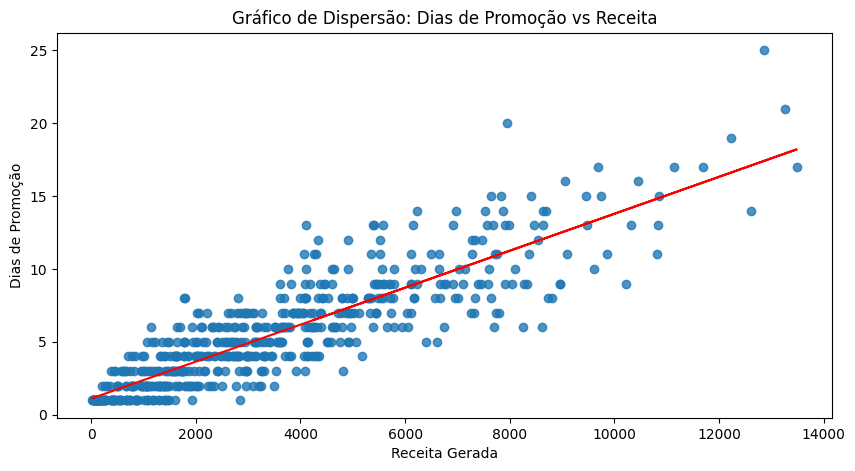

In [52]:
plt.figure(figsize=(10,5))
plt.scatter(receita_promo, dias_promo, alpha=0.8, label="Dados")
plt.plot(receita_promo,predicted_diaspromo, color="red", label="Regressão Linear")


plt.title("Gráfico de Dispersão: Dias de Promoção vs Receita")
plt.xlabel("Receita Gerada")
plt.ylabel("Dias de Promoção")


plt.show()

# Pearson entre receita e dias sem promoção

Pearson entre dias de promoção e receita gerada: 0.757646509321257
p-valor: 1.8249783823965514e-113




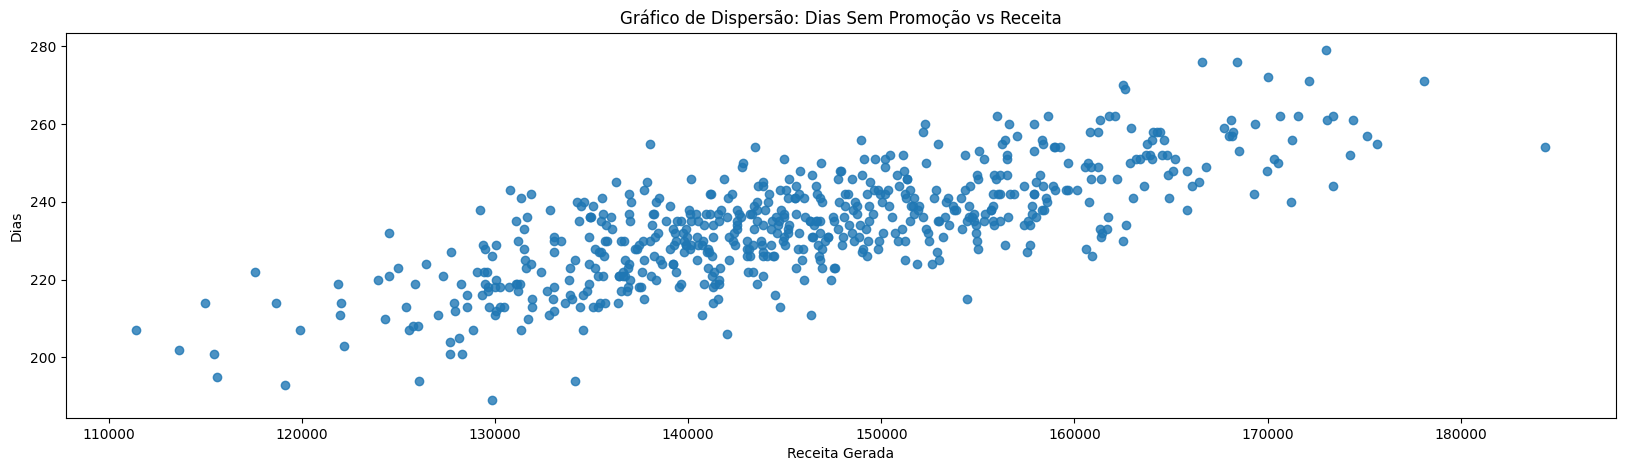

In [53]:
dias = df["Dias_SemPromo"]
receita = df["Receita_SemPromo"]

pearson, p_valor = stats.pearsonr(dias, receita)
print(f"Pearson entre dias de promoção e receita gerada: {pearson}\np-valor: {p_valor}\n\n")

plt.figure(figsize=(20,5))
plt.scatter(receita, dias, alpha=0.8)

plt.title("Gráfico de Dispersão: Dias Sem Promoção vs Receita")
plt.xlabel("Receita Gerada")
plt.ylabel("Dias")

plt.show()

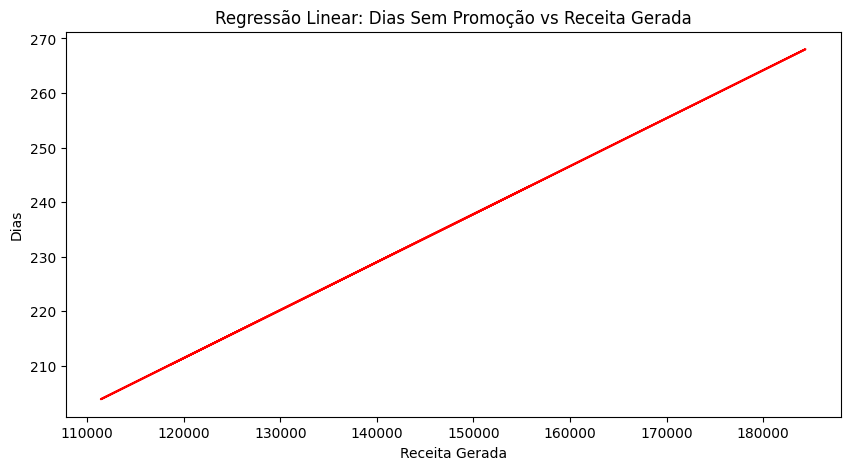

In [63]:
# Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(receita, dias)

# Valores preditos
predicted_dias = intercept + slope * receita

plt.figure(figsize=(10,5))
plt.plot(receita, predicted_dias, color="red")

plt.title("Regressão Linear: Dias Sem Promoção vs Receita Gerada")
plt.xlabel("Receita Gerada")
plt.ylabel("Dias")

plt.show()

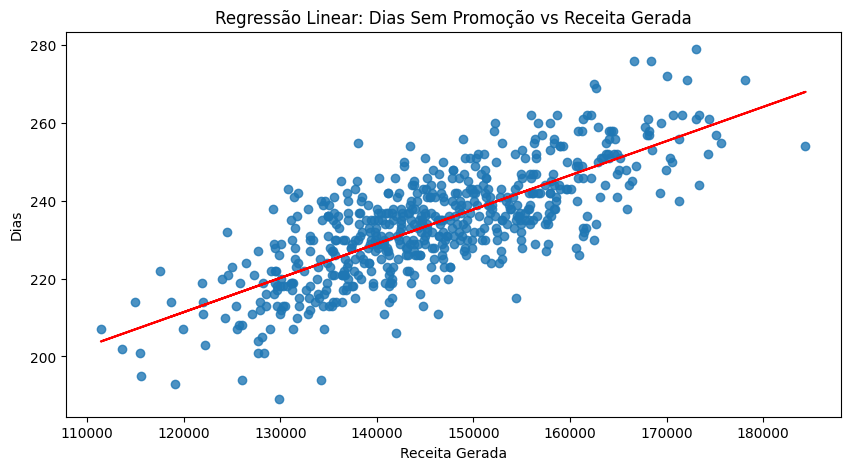

In [64]:
plt.figure(figsize=(10,5))
plt.scatter(receita, dias, alpha=0.8)
plt.plot(receita, predicted_dias, color="red")


plt.title("Regressão Linear: Dias Sem Promoção vs Receita Gerada")
plt.xlabel("Receita Gerada")
plt.ylabel("Dias")


plt.show()